In [362]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras import initializers
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
import seaborn as sns

In [363]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [364]:
initializer = initializers.RandomUniform(minval=-1.0, maxval=1.0)

class regressor(Model):
    def __init__(self):
        super(regressor, self).__init__()
        self.reg = tf.keras.Sequential([
            layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.2), kernel_initializer=initializer),
            layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.2), kernel_initializer=initializer),
            layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.2), kernel_initializer=initializer),
            layers.Dense(1, activation='sigmoid',kernel_initializer=initializer)
        ])

    def call(self, x):
        y = self.reg(x)
        return y

In [365]:
dataset = pd.read_csv('encoded_dataset.csv',usecols=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','heat_of_formation'])
dataset.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,heat_of_formation
0,-0.944244,-0.467843,-0.250634,-0.607917,0.722437,2.718357,1.390860,0.095709,-0.376503,-0.381374,-1.240558
1,-0.184422,-0.263323,-0.406619,1.421094,1.284893,3.853995,1.308007,-0.123640,1.368393,0.935994,-1.012833
2,-0.381459,-0.321316,-0.360481,0.190600,1.159082,3.447642,1.226776,-0.085541,0.499673,0.133785,-1.145090
3,-0.791677,-0.419213,-0.270855,-0.446005,0.817097,2.801007,1.504990,-0.020920,-0.254898,-0.273302,-1.112540
4,-0.785569,-0.452266,-0.316529,-0.389248,0.983658,3.238737,0.938708,0.085265,-0.219014,-0.267498,-1.162859


In [366]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [367]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [368]:
dataset.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,heat_of_formation
x1,1.000000,0.351601,-0.136828,0.384044,0.287792,-0.410522,-0.064510,-0.372696,0.718078,0.220726,0.253330
x2,0.351601,1.000000,0.215372,0.142751,-0.140811,-0.361768,0.796611,-0.907103,0.157708,0.382171,0.805385
x3,-0.136828,0.215372,1.000000,-0.563305,-0.450853,-0.499272,0.183730,-0.003746,-0.523451,-0.100701,0.320253
x4,0.384044,0.142751,-0.563305,1.000000,0.092220,0.528664,-0.072510,-0.133322,0.850025,0.664578,0.030118
x5,0.287792,-0.140811,-0.450853,0.092220,1.000000,-0.075760,-0.031875,-0.178773,0.362473,-0.540593,-0.316482
x6,-0.410522,-0.361768,-0.499272,0.528664,-0.075760,1.000000,-0.195292,0.379183,0.174411,0.320207,-0.364270
x7,-0.064510,0.796611,0.183730,-0.072510,-0.031875,-0.195292,1.000000,-0.740374,-0.154410,0.088284,0.747274
x8,-0.372696,-0.907103,-0.003746,-0.133322,-0.178773,0.379183,-0.740374,1.000000,-0.219043,-0.163399,-0.587545
x9,0.718078,0.157708,-0.523451,0.850025,0.362473,0.174411,-0.154410,-0.219043,1.000000,0.420462,0.009511
x10,0.220726,0.382171,-0.100701,0.664578,-0.540593,0.320207,0.088284,-0.163399,0.420462,1.000000,0.367204


In [369]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(dataset, 5))

Top Absolute Correlations
x2  x8                   0.907103
x4  x9                   0.850025
x2  heat_of_formation    0.805385
    x7                   0.796611
x7  heat_of_formation    0.747274
dtype: float64


<AxesSubplot:>

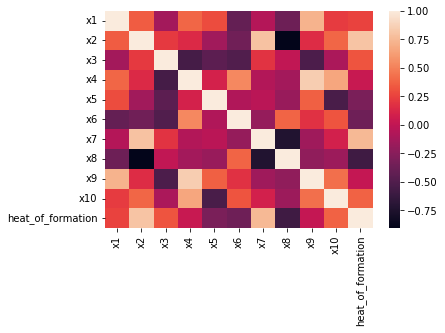

In [370]:
sns.heatmap(dataset.corr())

In [371]:
dataset = dataset.drop(['x4','x8', 'x9', 'x7'], axis=1)

In [372]:
dataset.head(5)

,x1,x2,x3,x5,x6,x10,heat_of_formation
0,-0.944244,-0.467843,-0.250634,0.722437,2.718357,-0.381374,-1.240558
1,-0.184422,-0.263323,-0.406619,1.284893,3.853995,0.935994,-1.012833
2,-0.381459,-0.321316,-0.360481,1.159082,3.447642,0.133785,-1.145090
3,-0.791677,-0.419213,-0.270855,0.817097,2.801007,-0.273302,-1.112540
4,-0.785569,-0.452266,-0.316529,0.983658,3.238737,-0.267498,-1.162859


In [373]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [374]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(432, 6) (108, 6) (432,) (108,)


In [375]:
sc_x = StandardScaler()
sc_x.fit(X_train)
X_train_sc = sc_x.transform(X_train)
X_test_sc = sc_x.transform(X_test)
ms_y = MinMaxScaler(feature_range=(0,1))
ms_y.fit(y_train.reshape(y_train.shape[0],-1))
y_train_sc = ms_y.transform(y_train.reshape(y_train.shape[0],-1))
y_test_sc = ms_y.transform(y_test.reshape(y_test.shape[0],-1))

In [376]:
def scheduler(epoch, lr):
    if epoch<25:
        return lr
    elif epoch >=50 and epoch < 75:
        return lr*0.99
    elif epoch >=75 and epoch <100:
        return lr*0.98
    else:
        return lr*0.80


In [377]:
lr_scheduler = LearningRateScheduler(
    scheduler,
    verbose=0
)

In [378]:
rlr = ReduceLROnPlateau(
    monitor='loss',
    patience=3,
    factor=0.85
)

In [379]:
model = regressor()
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.02), loss='mean_squared_error')

In [380]:
history = model.fit(X_train_sc, y_train_sc, epochs=200, batch_size=5, verbose=0, shuffle=True, callbacks=[rlr,lr_scheduler])

In [381]:
def plot_loss(history):
    plt.figure(figsize=(10,5))
    plt.plot(history.history['loss'], label='loss', color='red')
    #plt.plot(history.history['val_loss'], label='val_loss', color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [394]:
print(f"final training loss: {(history.history['loss'][-1])*100:.2f} %" )

final training loss: 0.13 %


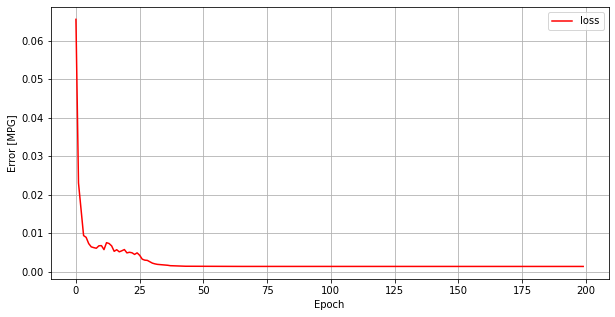

In [382]:
plot_loss(history)

### Testing the model

In [383]:
y_true = y_test_sc.reshape(-1,y_test_sc.shape[0])
y_pred = model.predict(X_test_sc)
y_pred = y_pred.reshape(-1,y_pred.shape[0])

In [384]:
mse = tf.keras.losses.MeanSquaredError()
error = mse(y_pred, y_true).numpy()
print(f'Test Error of model : {error*100:.2f} %')

Test Error of model : 0.24 %


In [385]:
unexplained_error = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
total_error = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
R_squared = tf.subtract(1, tf.divide(unexplained_error, total_error))
print(f'r2 score of the model : {R_squared.numpy():.4f}')

r2 score of the model : 0.9535


### Plot of Predicted heat of formation vs True heat of formation

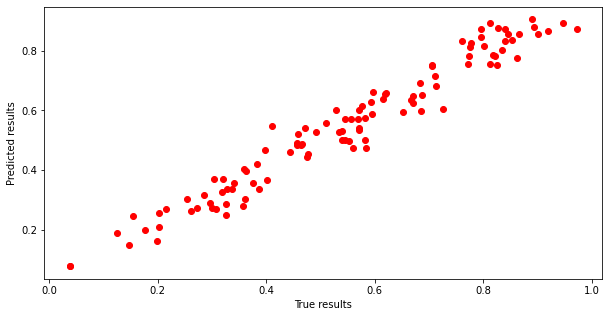

In [386]:
plt.figure(figsize=(10,5))
plt.scatter(y_true, y_pred, color='red')
plt.xlabel('True results')
plt.ylabel('Predicted results')
plt.show()

### Model Architecture Visualization

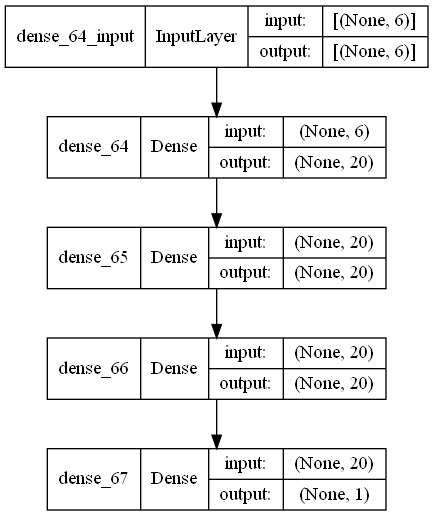

In [387]:
from tensorflow.keras.utils import plot_model
plot_model(model.reg, to_file='model.png',show_shapes=True)